In [28]:
%tensorflow_version 2.x

In [29]:
import tensorflow as tf
print(tf.__version__)


2.3.0


In [30]:
!pip install mitdeeplearning 
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt


In [31]:
strng = tf.constant("Random" , tf.string)
floatt = tf.constant(1.320 , tf.float64)
#rank provides the number of dimensions of tensor
print("this is a string {}-d tensor".format(tf.rank(strng).numpy()))
print("this is a float {}-d tensor".format(tf.rank(floatt))) #0 dimensions are called scalars

this is a string 0-d tensor
this is a float 0-d tensor


In [32]:
string2=tf.constant(['sam','raj'],tf.string)
float2=tf.constant([1.2,45.0],tf.float64)
print("rank:{}-d string".format(tf.rank(string2)))
print("rank:{}-d float".format(tf.rank(float2)))

rank:1-d string
rank:1-d float


In [33]:
matrix = tf.constant(([2,3],[4,5]),tf.int64)
print(tf.rank(matrix).numpy())



2


In [39]:
images = tf.zeros([10,256,256,3],tf.int64) #this is a 4d tensor similar to
print(tf.rank(images).numpy()) # 10 images RGB 256 x 256

4


In [41]:
tf.shape(images).numpy().tolist()

[10, 256, 256, 3]

In [44]:
tf.rank(matrix).numpy()

2

In [46]:
a = tf.constant(([1,2,3],[4,5,6]),tf.int64)

In [54]:
row_vector = a[1]
column_vector = a[:,2]
scalar_matrix= a[1,2]
print(row_vector.numpy().tolist())
print(column_vector.numpy().tolist())
print(scalar_matrix.numpy().tolist())

[4, 5, 6]
[3, 6]
6


In [57]:
a=tf.constant(10)
b=tf.constant(20)
c=tf.add(a,b)
d=a+b
print(c.numpy() , d.numpy())

30 30


In [60]:
a = tf.constant(20)
b=tf.constant(30)
d=tf.subtract(b,1)
c=tf.add(a,b)
e=tf.multiply(c,d)
print(a.numpy() , b.numpy(), d.numpy , c.numpy() , e.numpy() )

20 30 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=29>> 50 1450


#Defining a Neural Net

In [87]:
#n_output_nodes : number of output nodes, final end value
#input_shape : shape of input
#x : input value
#The super() function is used to give access to methods and properties of a parent or sibling class.
#The super() function returns an object that represents the parent class
#setting random seed to a specific number for future reference



class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    
    z = tf.matmul(x , self.W) + self.b

    
    y = tf.sigmoid(z)
    return y

tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())


[[0.2697859  0.45750412 0.66536945]]


#Defining using sequential API

In [91]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3
model = Sequential()

layer = Dense(n_output_nodes , activation='sigmoid')

model.add(layer)

x_input = tf.constant([[1,2.]] , shape=(1,2))

model_output = model(x_input).numpy()
model_output

array([[0.5607363, 0.6566898, 0.1249697]], dtype=float32)

In [92]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense


class SubclassModel(tf.keras.Model):
  def __init__(self , n_output_nodes):
    super(SubclassModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes,activation='sigmoid')
  def call(self,inputs):
    return self.dense_layer(inputs)

In [93]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]] , shape=(1,2))
print(model.call(x_input))



tf.Tensor([[0.6504887  0.47828162 0.8373661 ]], shape=(1, 3), dtype=float32)


In [97]:
# Checking How gradient tape works(required for backpropogation)

x = tf.Variable(3.0)
with tf.GradientTape() as tape:
  y = x * x 
dy_dx = tape.gradient(y,x)
dy_dx.numpy()


6.0

Initializing x=[[0.6118191]]


Text(0, 0.5, 'x value')

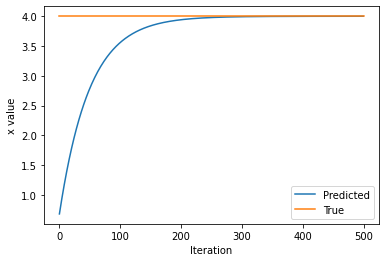

In [98]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x-x_f)**2# TODO

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')